<a href="https://colab.research.google.com/github/JoaoSald/Processamento_digital_de_Imagens/blob/master/provaPraticaIPI_2023_infobio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROVA PRÁTICA**

**EMILIE GA EUN KIM**

# **Questão 1**

a) Plote o histograma da imagem, avalie-o.

b) Caso considere necessário realize a equalização de histograma da imagem. Justifique o
tipo de equalização utilizado (equalização global ou equalização CLAHE). Plote a
imagem original ao lado da imagem equalizada. Plote também os respectivos histogramas das
imagens. Discuta qualitativamente o resultado obtido.

In [ ]:
import cv2 # importando a biblioteca OpenCv
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Leitura da imagem com a função imread()

imagem = cv2.imread('Fig0459(a)(orig_chest_xray).tif') #imagem.thetype dá o volume
print('Largura em pixels: ', end='')
print(imagem.shape[1]) #largura da imagem
print('Altura em pixels: ', end='')
print(imagem.shape[0]) #altura da imagem
print('Qtde de canais: ', end='')
print(imagem.shape[2])

Largura em pixels: 596
Altura em pixels: 416
Qtde de canais: 3


A imagem possui 3 canais.


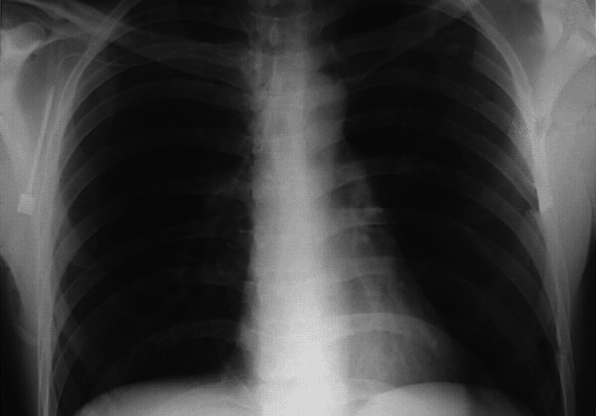

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Leitura da imagem
imagem = cv2.imread('Fig0459(a)(orig_chest_xray).tif')

# Verificar o número de canais
num_canais = imagem.shape[2]

# Imprimir o resultado
print(f'A imagem possui {num_canais} canais.')

# Mostrar a imagem
cv2_imshow(imagem)


Foi possível verificar que há 3 canais na imagem (RGB).

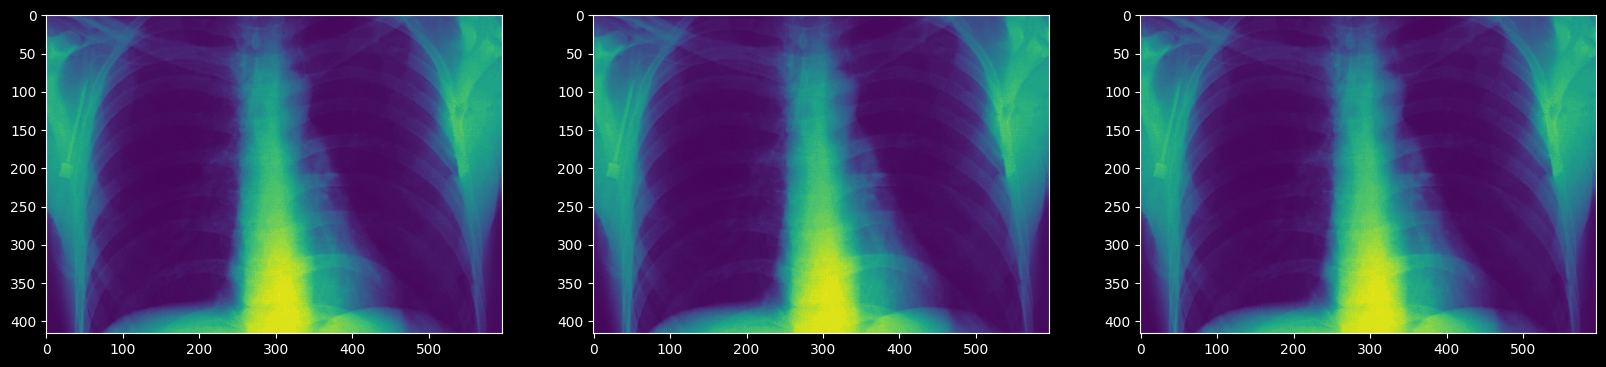

In [ ]:
figure, axarr = plt.subplots(1,3, figsize=(20,20))
axarr[0].imshow(imagem[:,:,0])
axarr[1].imshow(imagem[:,:,1])
axarr[2].imshow(imagem[:,:,2])

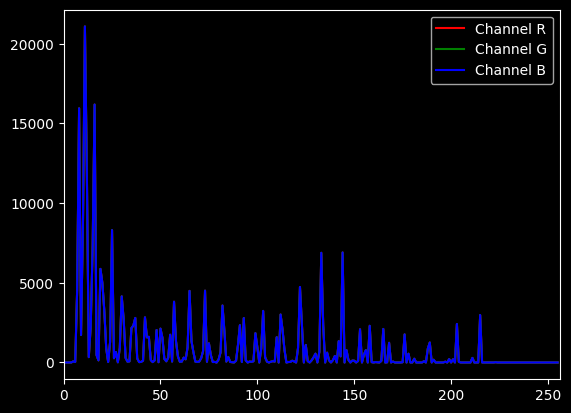

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Suponha que você já tenha uma imagem carregada no array 'imagem'

color = ('r', 'g', 'b')

# Loop through each color sequentially
for i, col in enumerate(color):
    histr, _ = np.histogram(imagem[:, :, i], 256, [0, 256])
    plt.plot(histr, color=col, label=f'Channel {col.upper()}')  # Adiciona label para distinguir os canais
    plt.xlim([0, 256])

plt.legend()  # Adiciona a legenda
plt.show()

A partir do histograma acima, referente à imagem original ainda não equalizada, é possível notar uma baixa distribuição das intensidades de pixel para a cor azul. Sobrepondo os canais R (vermelho) e G (verde).

No código abaixo está sendo realizada a equalização de histograma separadamente para cada canal de cor (azul, verde e vermelho) em uma imagem colorida e, em seguida, empilhando os canais equalizados de volta para formar uma imagem equalizada.

In [ ]:
# For ease of understanding, we explicitly equalize each channel individually
colorimage_b = cv2.equalizeHist(imagem[:,:,0])
colorimage_g = cv2.equalizeHist(imagem[:,:,1])
colorimage_r = cv2.equalizeHist(imagem[:,:,2])

# Aqui, a função cv2.equalizeHist do OpenCV está sendo usada para equalizar o histograma de cada canal separadamente.
# Isso melhora o contraste da imagem, especialmente quando há grandes discrepâncias nas intensidades dos pixels nos diferentes canais.

# Next we stack our equalized channels back into a single image

# A função np.stack do NumPy é usada para empilhar os canais equalizados de volta em uma única imagem equalizada.
# O parâmetro axis=2 especifica que a empilhamento deve ser feito ao longo do eixo 2, que corresponde aos canais de cor.
colorimage_e = np.stack((colorimage_b,colorimage_g,colorimage_r), axis=2)

# Isso imprime a forma (shape) da nova imagem equalizada.
# A forma será a mesma que a imagem original, indicando que ainda temos três canais de cor (azul, verde e vermelho).
colorimage_e.shape

(416, 596, 3)

o trecho de código abaixo cria uma figura com três subplots, onde cada subplot exibe uma imagem correspondente a um canal de cor da imagem equalizada

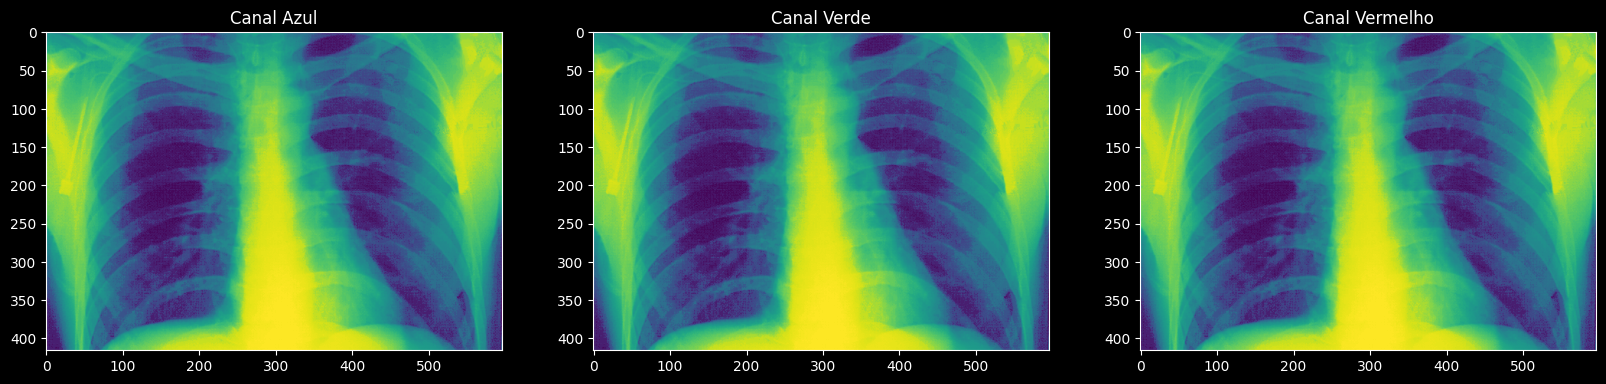

In [ ]:
# plt.subplots(1, 3, figsize=(20, 20)) cria uma figura com uma única linha e três colunas de subplots.
# A variável figure representa a figura geral, e axarr é uma matriz que contém os eixos (subplots). A opção figsize=(20, 20) define o tamanho da figura.

figure, axarr = plt.subplots(1,3, figsize=(20,20))

# Cada linha usa os métodos imshow dos objetos de eixo (axarr) para exibir as imagens dos canais de cor na sua posição correspondente.
# O índice 0 refere-se ao canal azul, 1 ao canal verde e 2 ao canal vermelho.

# Para adicionar um título a um subplot em Matplotlib, você deve usar o método set_title, não title

axarr[0].imshow(colorimage_e[:, :, 0])
axarr[0].set_title("Canal Azul")

axarr[1].imshow(colorimage_e[:, :, 1])
axarr[1].set_title("Canal Verde")

axarr[2].imshow(colorimage_e[:, :, 2])
axarr[2].set_title("Canal Vermelho")

plt.show()


A representação visual dos canais é útil para observar como a equalização do histograma afetou cada componente de cor individualmente. A figura resultante contém três subplots, cada um mostrando a imagem resultante após a equalização do histograma para um canal específico.

O trecho de código abaixo utiliza a biblioteca NumPy para calcular o histograma da imagem equalizada (colorimage_e) e, em seguida, plota o histograma para cada canal de cor (azul, verde e vermelho).

Esse código é semelhante ao trecho anterior, mas agora está sendo usado para visualizar o histograma da imagem equalizada, após a equalização do histograma separadamente para cada canal de cor. O gráfico do histograma ajudará a entender como a equalização afetou a distribuição das intensidades de pixel em cada canal.

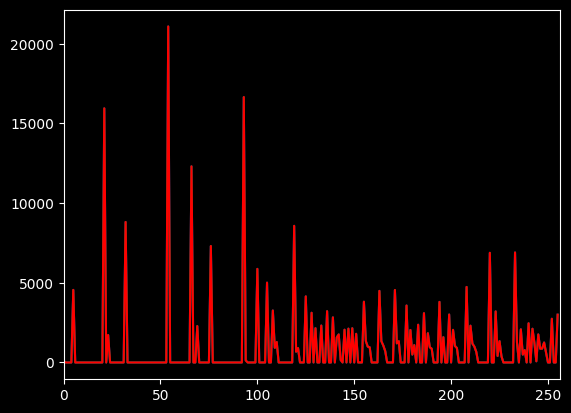

In [ ]:
# Using Numpy to calculate the histogram
color = ('b','g','r')
for i,col in enumerate(color):
    histr, _ = np.histogram(colorimage_e[:,:,i],256,[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

plt.show()

# np.histogram é usado para calcular o histograma do canal de cor atual (colorimage_e[:, :, i]).
# Os resultados são armazenados em histr. Em seguida, plt.plot é usado para traçar o histograma com a cor especificada pelo canal atual (col)

# plt.show() é chamado para exibir o gráfico do histograma resultante.
# Este gráfico mostra a distribuição das intensidades de pixel para cada canal de cor na imagem equalizada.


A partir do histograma equalizado acima, é possível notar uma maior distribuição das intensidades de pixel para a cor vermelha na imagem equalizada.

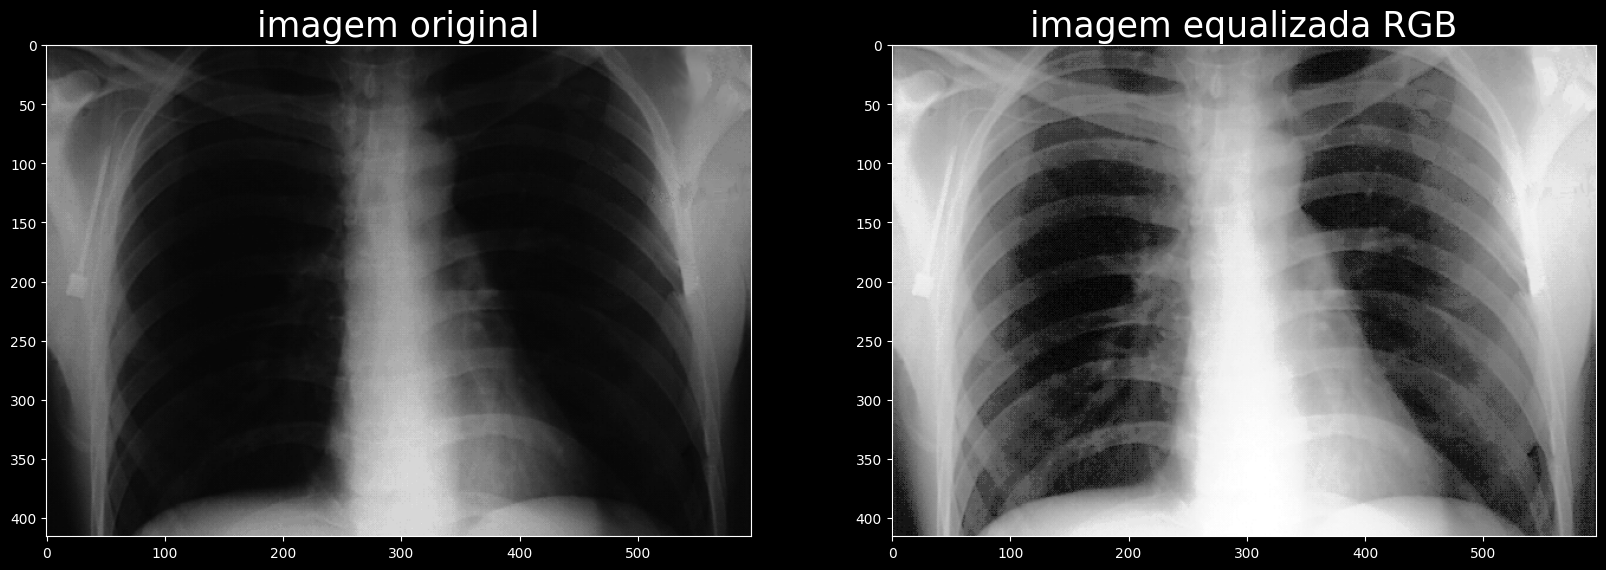

In [ ]:
figure, axarr = plt.subplots(1,2, figsize=(20,20))
axarr[0].imshow(imagem), axarr[0].set_title('imagem original',size=25);
axarr[1].imshow(colorimage_e), axarr[1].set_title('imagem equalizada RGB',size=25);

Na imagem acima, conseguimos observar a diferença entre a imagem original e a imagem equalizada em RGB. Na imagem equalizada notamos uma maior nitidez nos detalhes e melhor visualização.

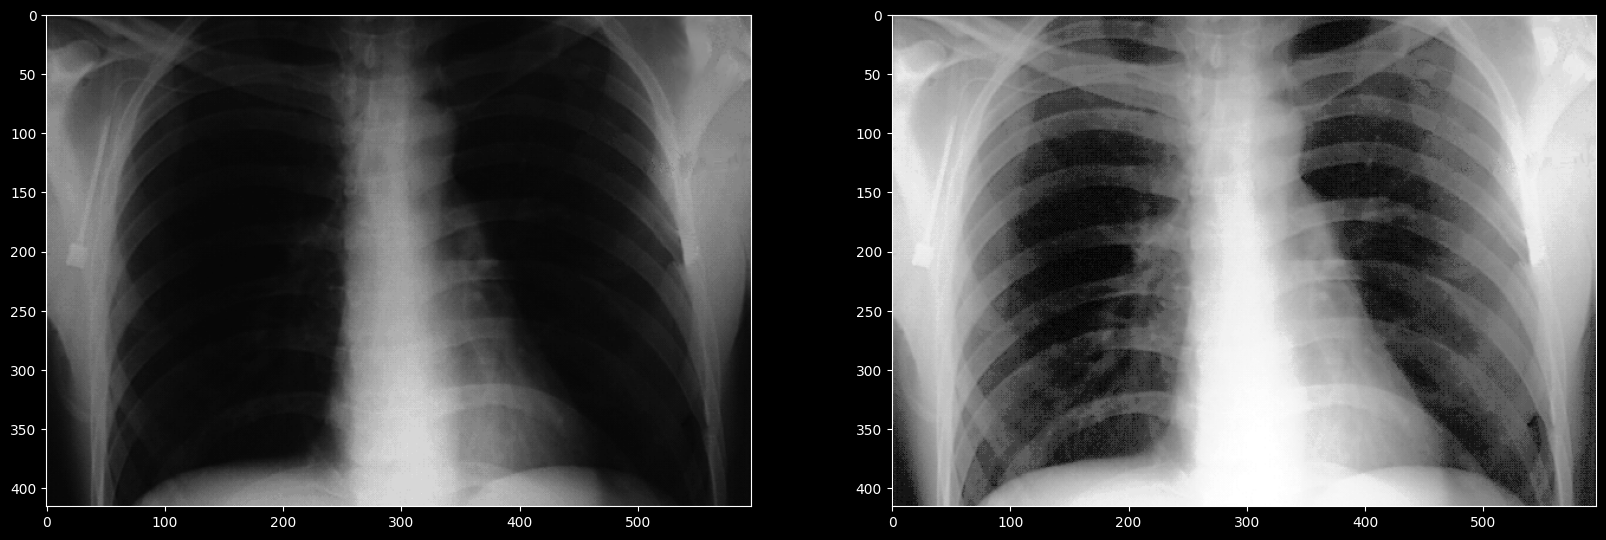

In [ ]:
figure, axarr = plt.subplots(1,2, figsize=(20,20))
axarr[0].imshow(imagem)
axarr[1].imshow(colorimage_e)

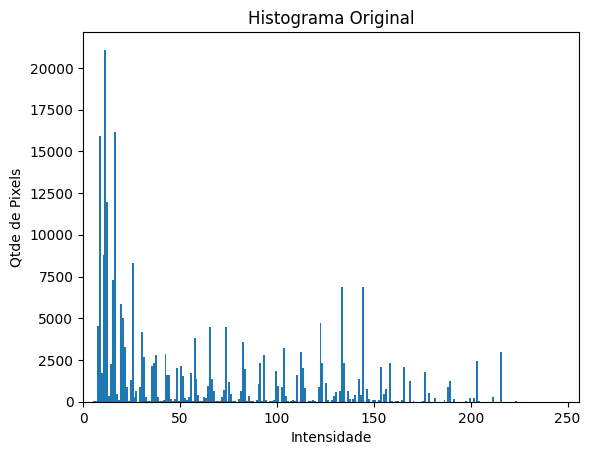

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# PLOTAR HISTOGRAMA ORIGINAL -> PERCEBEMOS TONS MAIS ESCUROS -> FALTA DE DETALHES -> PRECISA EQUALIZAR

from matplotlib import pyplot as plt
import numpy as np
import cv2

im1 = cv2.imread('Fig0459(a)(orig_chest_xray).tif')
img = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) #cv2.color -> qual variável vai ser alterada? na matriz, do pradrão BGR (openCV) -> transformando o BGR em uma imagem de escala de cinza

#operação de equalização do histograma:
# h_eq = cv2.equalizeHist(img) #equação de T(r) do gonzales

plt.figure()
plt.title("Histograma Original")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(img.ravel(), 256, [0,256])
plt.xlim([0, 256])
plt.show()
plt.figure()

No Histograma original a cima, é possível identificar a presença de tons mais escuros, o que pode gerar uma falta de detalhes na imagem, tornando-se necessário realizar a equalização do histograma.

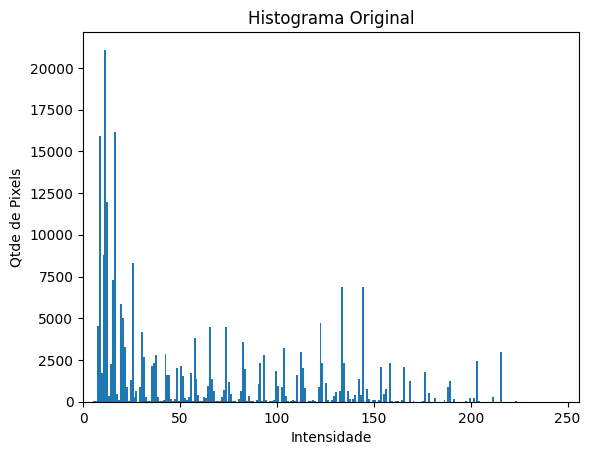

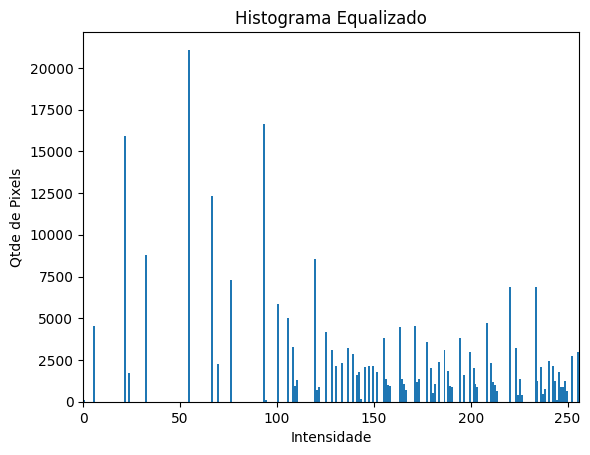

-1

In [ ]:
# EQUALIZAÇÃO DE HISTOGRAMA DA IMAGEM -> IMAGEM FICOU MAIS CLARA

from matplotlib import pyplot as plt
import numpy as np
import cv2

im1 = cv2.imread('Fig0459(a)(orig_chest_xray).tif')
img = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) #cv2.color -> qual variável vai ser alterada? na matriz, do pradrão BGR (openCV) -> transformando o BGR em uma imagem de escala de cinza

#operação de equalização do histograma:
# técnica que modifica a intensidade de pixels da imagem, aumentando o contraste geral
h_eq = cv2.equalizeHist(img) #equação de T(r) do gonzales

plt.figure()
plt.title("Histograma Original")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(img.ravel(), 256, [0,256])
plt.xlim([0, 256])
plt.show()
plt.figure()
plt.title("Histograma Equalizado")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(h_eq.ravel(), 256, [0,256])
plt.xlim([0, 256])
plt.show()
cv2.waitKey(0)

Com o processo de equalização global, é possível notar uma melhor distribuição de pixels e a presença de tons mais claros, deixando a imagem com uma maior nitidez, sendo possível observar a mudança na imagem equalizada abaixo:

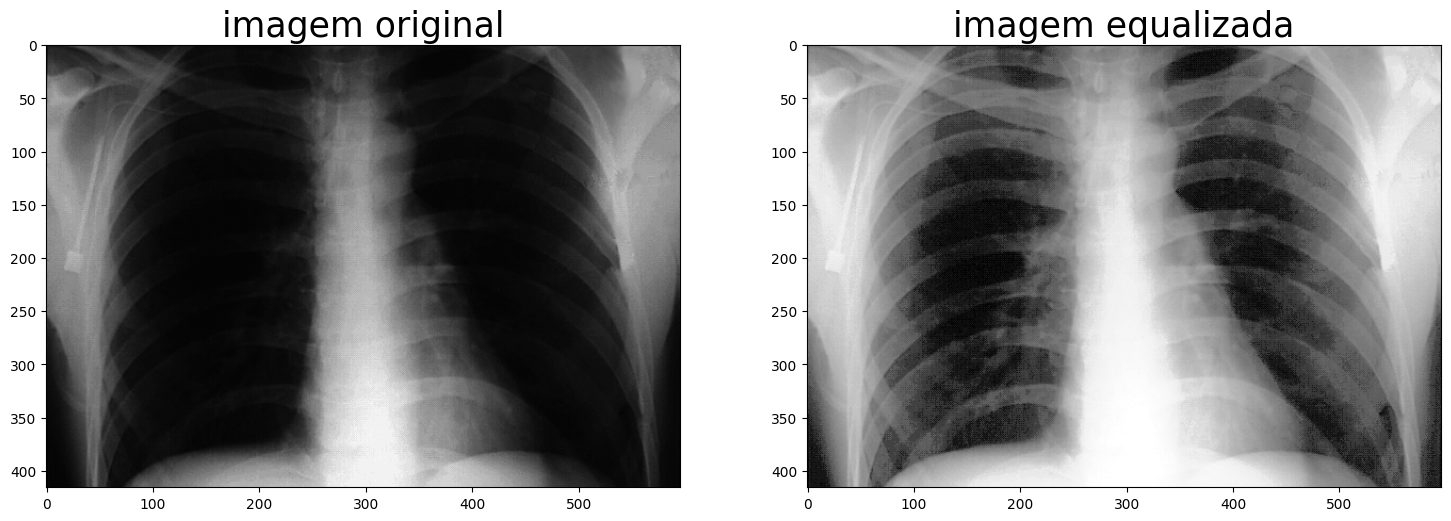

In [ ]:
plt.figure(figsize=(18,10));
plt.subplot(1,2,1);plt.imshow(img, cmap ='gray');plt.title('imagem original',size=25)
plt.subplot(1,2,2);plt.imshow(h_eq, cmap ='gray');plt.title('imagem equalizada',size=25);

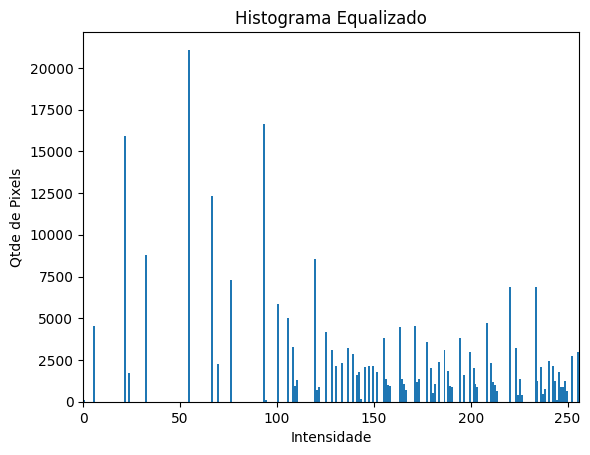

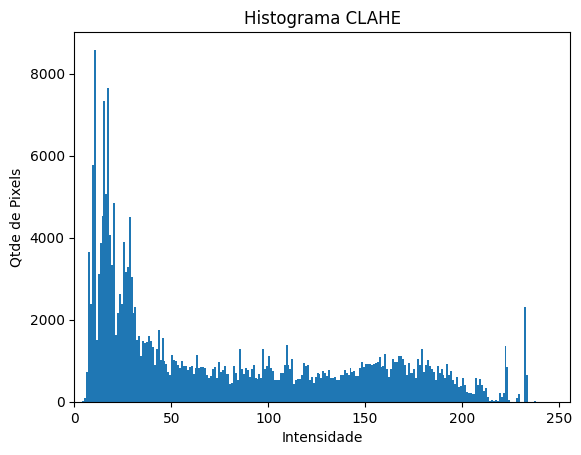

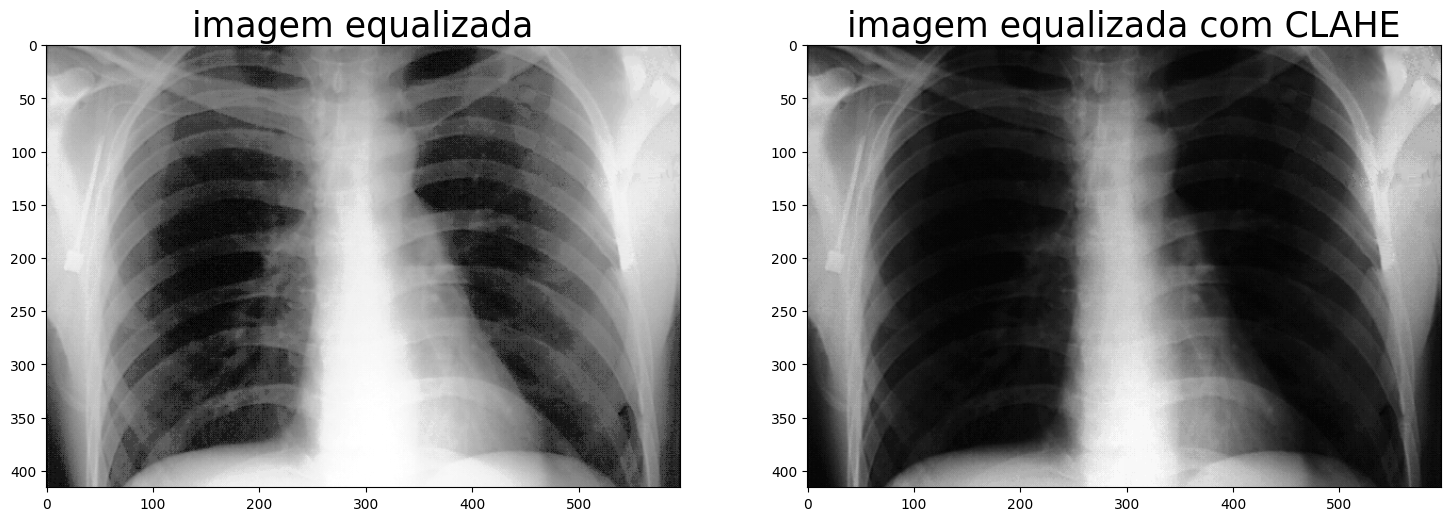

In [ ]:
import numpy as np
import cv2 as cv
# create a CLAHE object (Arguments are optional).

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
cl1 = clahe.apply(img)

plt.figure()
plt.title("Histograma Equalizado")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(h_eq.ravel(), 256, [0,256])
plt.xlim([0, 256])
plt.show()
plt.figure()
plt.title("Histograma CLAHE")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(cl1.ravel(), 256, [0,256])
plt.xlim([0, 256])
plt.show()
cv2.waitKey(0)

# CLAHE melhorou o contraste sem afetar a imagem com alto contraste
plt.figure(figsize=(18,10));
plt.subplot(1,2,1);plt.imshow(h_eq, cmap ='gray');plt.title('imagem equalizada',size=25)
plt.subplot(1,2,2);plt.imshow(cl1, cmap ='gray');plt.title('imagem equalizada com CLAHE',size=25);

Aplicando a equalização CLAHE é possível notar um maior contraste na imagem, em comparação com a imagem equalizada globalmente. E o com a equalização CLAHE, em comparação com a imagem original, há uma nitidez e visualização melhor e com contraste.

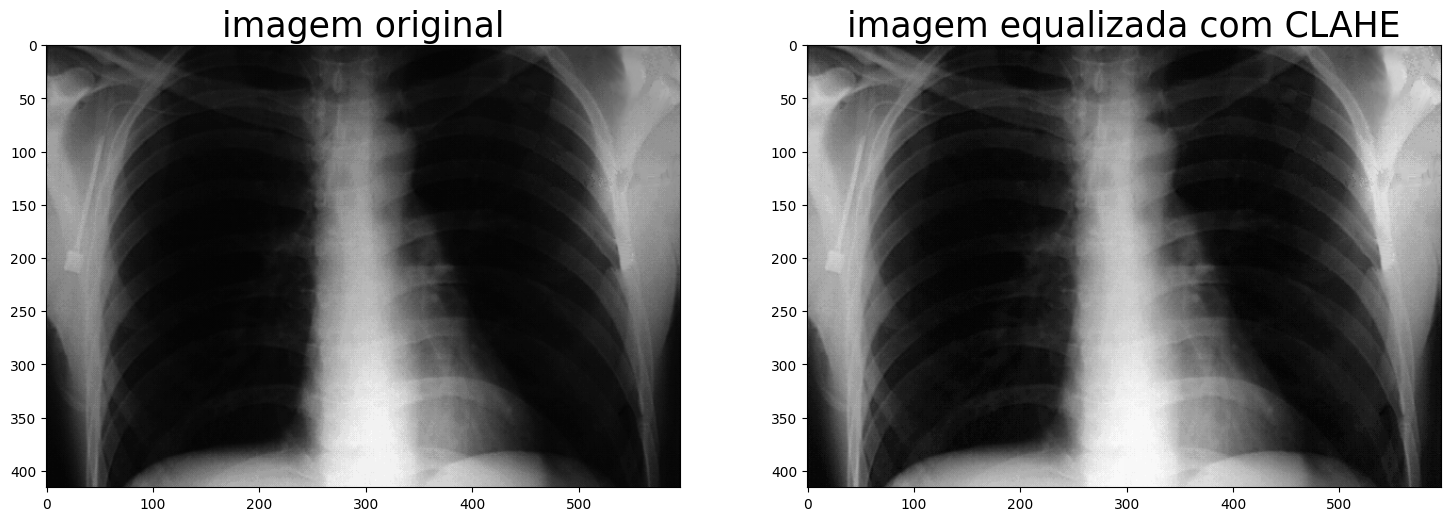

In [ ]:
plt.figure(figsize=(18,10));
plt.subplot(1,2,1);plt.imshow(img, cmap ='gray');plt.title('imagem original',size=25)
plt.subplot(1,2,2);plt.imshow(cl1, cmap ='gray');plt.title('imagem equalizada com CLAHE',size=25);

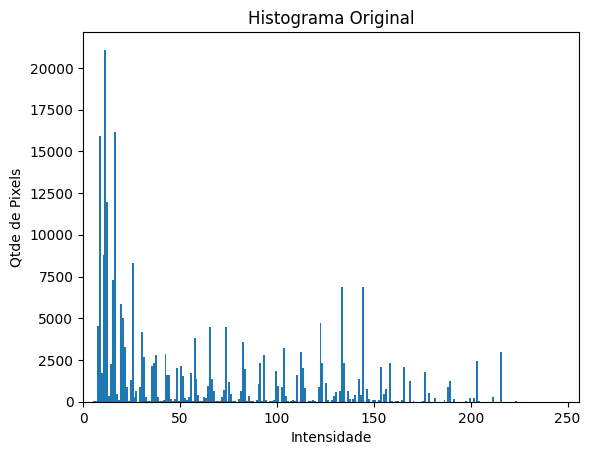

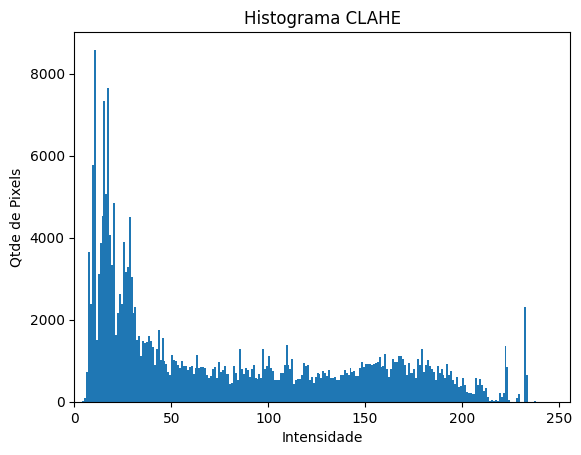

-1

In [ ]:
plt.figure()
plt.title("Histograma Original")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(img.ravel(), 256, [0,256])
plt.xlim([0, 256])
plt.show()
plt.figure()
plt.title("Histograma CLAHE")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(cl1.ravel(), 256, [0,256])
plt.xlim([0, 256])
plt.show()
cv2.waitKey(0)

# **Questão 2**

Realizar, através das técnicas de morfologia matemática, a filtragem dos elementos que
estão corrompendo o retângulo na Figura 9.17 do capítulo 9 de González & Woods.

OBS: a imagem filtrada deve conter apenas o retângulo (branco) e fundo preto.

In [ ]:
#Bibliotecas
import cv2
from matplotlib import pyplot as plt
import numpy as np
import PIL.Image as Image
plt.style.use("dark_background")

valor maximo de pixel da imagem original =  255 , e valor maximo de pixel da imagem normalizada =  1.0


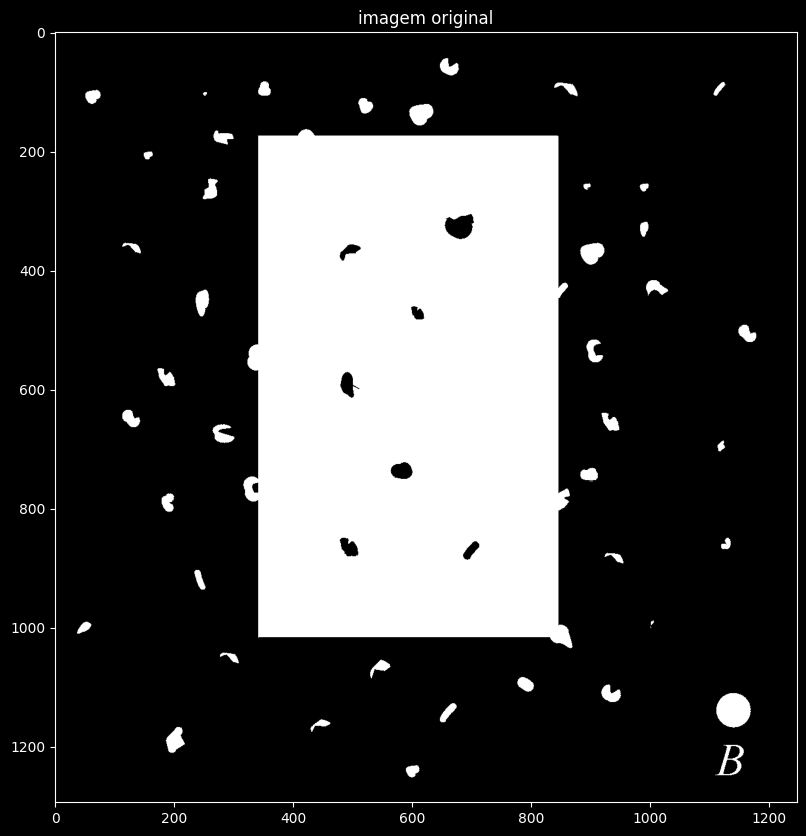

In [ ]:
# IMPORTAR A IMAGEM
img = cv2.imread('FigP0917(noisy_rectangle).tif')

# NORMALIZAR A IMAGEM
# Normalizar uma imagem geralmente significa escalar os valores dos pixels para que eles estejam dentro de um intervalo específico, como [0, 1] ou [-1, 1].
img_n = (img - img.min())/(img.max()-img.min())

print("valor maximo de pixel da imagem original = ",img.max(), ', e valor maximo de pixel da imagem normalizada = ', img_n.max())

plt.figure(figsize = (10,10))
plt.imshow(img, cmap="Greys"); plt.title('imagem original');

**CORREÇÃO DA QUESTÃO 2**

Abaixo foi realizada a operação de abertura (erodir e depois dilatar) para remover os elementos que corrompem o fundo preto e fundir os elementos no quadrado branco, tornando-o homogêneo. Foi utilizada a máscara retangular durante todo o processo.

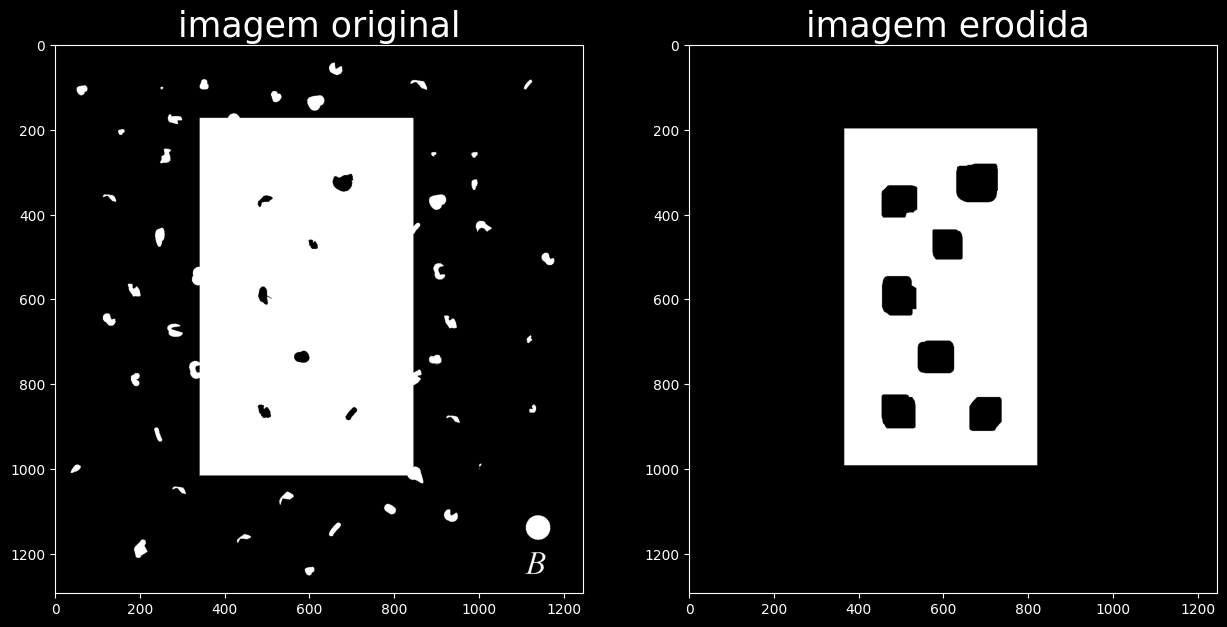

In [ ]:
# KERNEL (k)
N = 50
KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular
# KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
#KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KR # escolha da mascara

erode = cv2.erode(img, KQ, iterations=1)

plt.figure(figsize=[15,10]);
plt.subplot(1,2,1);plt.imshow(img, cmap='gray');plt.title('imagem original',size=25)
plt.subplot(1,2,2);plt.imshow(erode, cmap='gray');plt.title('imagem erodida ',size=25);

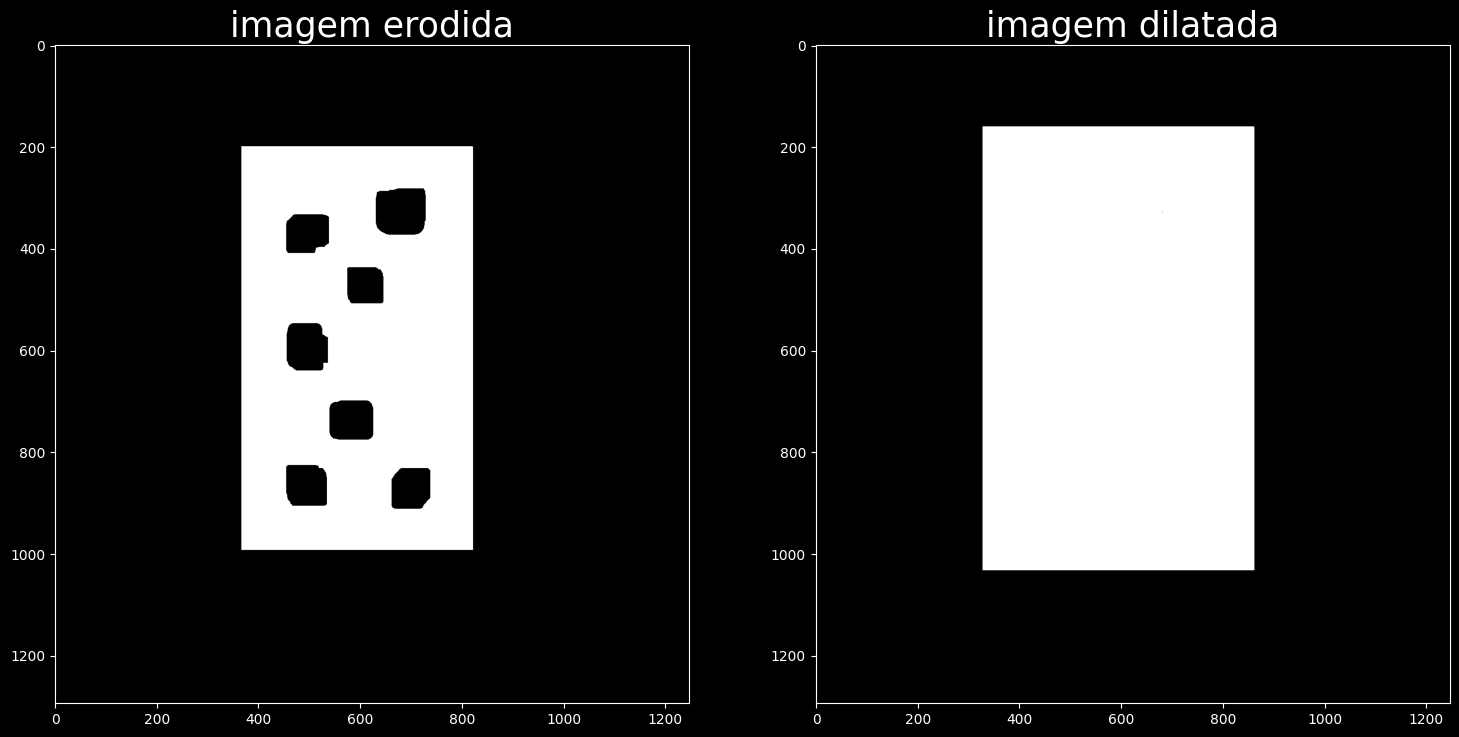

In [ ]:
# KERNEL (k)
N = 80 #  tamanho
KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular
#KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
#KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KR # escolha da mascara

dilate = cv2.dilate(erode, KQ, iterations=1)  # processo da lógica hit -> iteractions=1

plt.figure(figsize=(18,10));
# NÃO ESQUECER DE MUDAR NOMES DE VARIÁVEIS
plt.subplot(1,2,1);plt.imshow(erode, cmap ='gray');plt.title('imagem erodida',size=25)
plt.subplot(1,2,2);plt.imshow(dilate, cmap ='gray');plt.title('imagem dilatada',size=25);

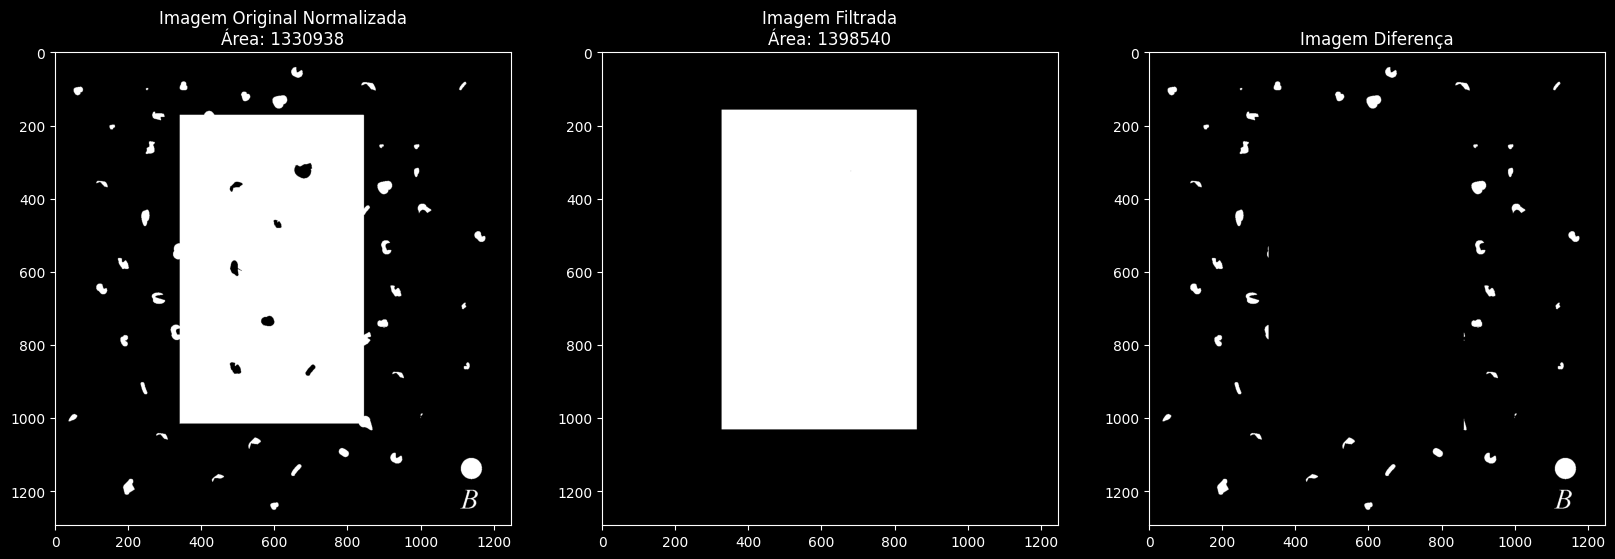

In [ ]:
import cv2
import matplotlib.pyplot as plt

# IMPORTAR A IMAGEM
img_original = cv2.imread('FigP0917(noisy_rectangle).tif')

# NORMALIZAR A IMAGEM
img_original_normalized = (img_original - img_original.min()) / (img_original.max() - img_original.min())

# Aplicar qualquer filtro desejado (por exemplo, erosão)
#N = 45
#KR = cv2.getStructuringElement(cv2.MORPH_RECT, (N, N))
img_filtered = dilate

# Calcular as áreas dos retângulos nas imagens original e filtrada
area_original = (img_original_normalized > 0).sum()
area_filtrada = (img_filtered > 0).sum()

# Criar a imagem diferença
img_diferenca = img_original_normalized - (img_filtered - img_filtered.min()) / (img_filtered.max() - img_filtered.min())

# Exibir as imagens
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(img_original_normalized, cmap="Greys")
plt.title(f'Imagem Original Normalizada\nÁrea: {area_original}')

plt.subplot(1, 3, 2)
plt.imshow(img_filtered, cmap="Greys")
plt.title(f'Imagem Filtrada\nÁrea: {area_filtrada}')

plt.subplot(1, 3, 3)
plt.imshow(img_diferenca, cmap="gray")
plt.title('Imagem Diferença')

plt.show()


Acima, é possível notar a diferença entre a imagem original e a imagem filtrada (final), com as medidas de área e a imagem diferença. Dessa forma, notamos que os ruídos foram removidos e a forma do retânulo branco mantida, com pouca diferença em área.

**FORMA ERRADA**

Abaixo foi realizada a operação de fechamento (dilatar e depois erodir), e depois uma abertura (erodir e depois dilatar) para remover os elementos que corrompem o fundo preto e o retângulo branco. Com o fechamento é possível fundir partes e eliminar pequenos buracos, e a abertura permite remover ruídos e recuperar a forma da imagem dilatada.

Foram aplicados kernels de tamanho 40 no fechamento, tamanho 60 na erosão da abertura e 25 na dilatação da abertura.

Foi utilizada a máscara elíptica durante todo o processo.

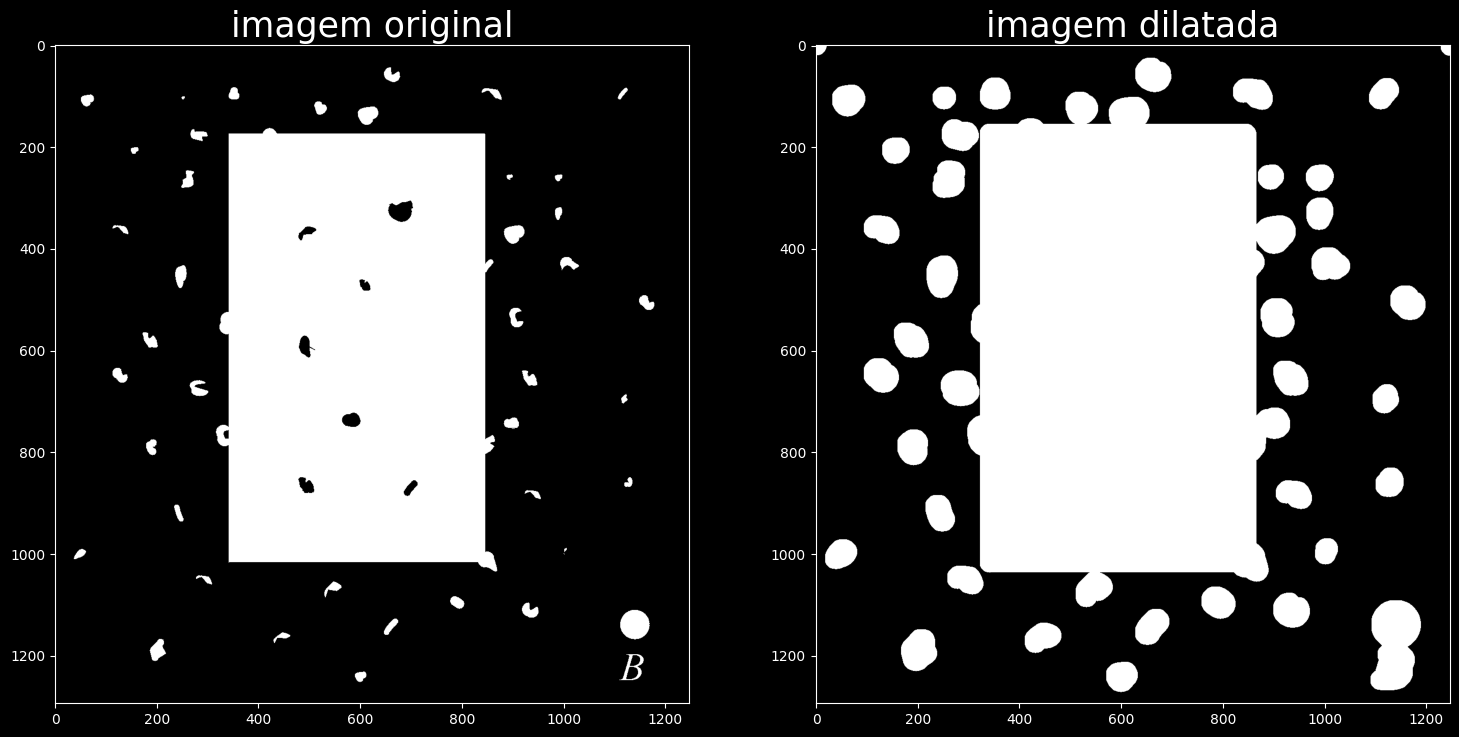

In [ ]:
# DILATAÇÃO DE FECHAMENTO

# KERNEL (k)
N = 40 #  tamanho
#KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular
KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
#KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KE # escolha da mascara

dilate = cv2.dilate(img, KQ, iterations=1)  # processo da lógica hit -> iteractions=1

plt.figure(figsize=(18,10));
# NÃO ESQUECER DE MUDAR NOMES DE VARIÁVEIS
plt.subplot(1,2,1);plt.imshow(img, cmap ='gray');plt.title('imagem original',size=25)
plt.subplot(1,2,2);plt.imshow(dilate, cmap ='gray');plt.title('imagem dilatada',size=25);

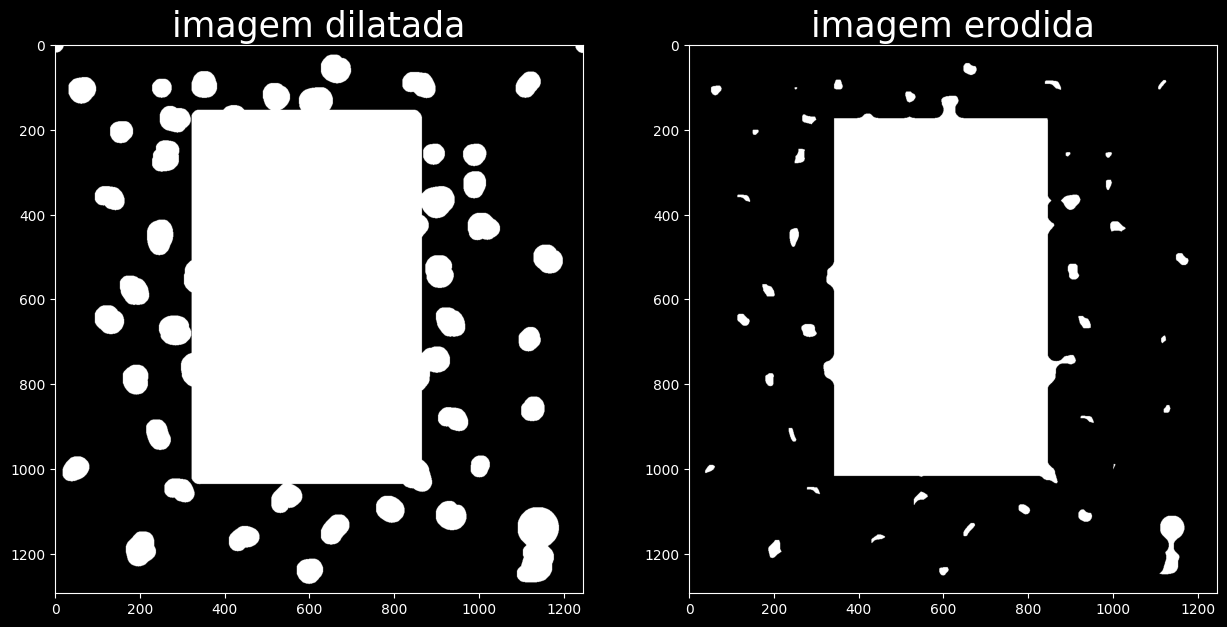

In [ ]:
# EROSÃO DE FECHAMENTO

# KERNEL (k)
N = 40
#KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular
KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
#KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KE # escolha da mascara

erode = cv2.erode(dilate, KQ, iterations=1)

plt.figure(figsize=[15,10]);
plt.subplot(1,2,1);plt.imshow(dilate, cmap='gray');plt.title('imagem dilatada',size=25)
plt.subplot(1,2,2);plt.imshow(erode, cmap='gray');plt.title('imagem erodida',size=25);

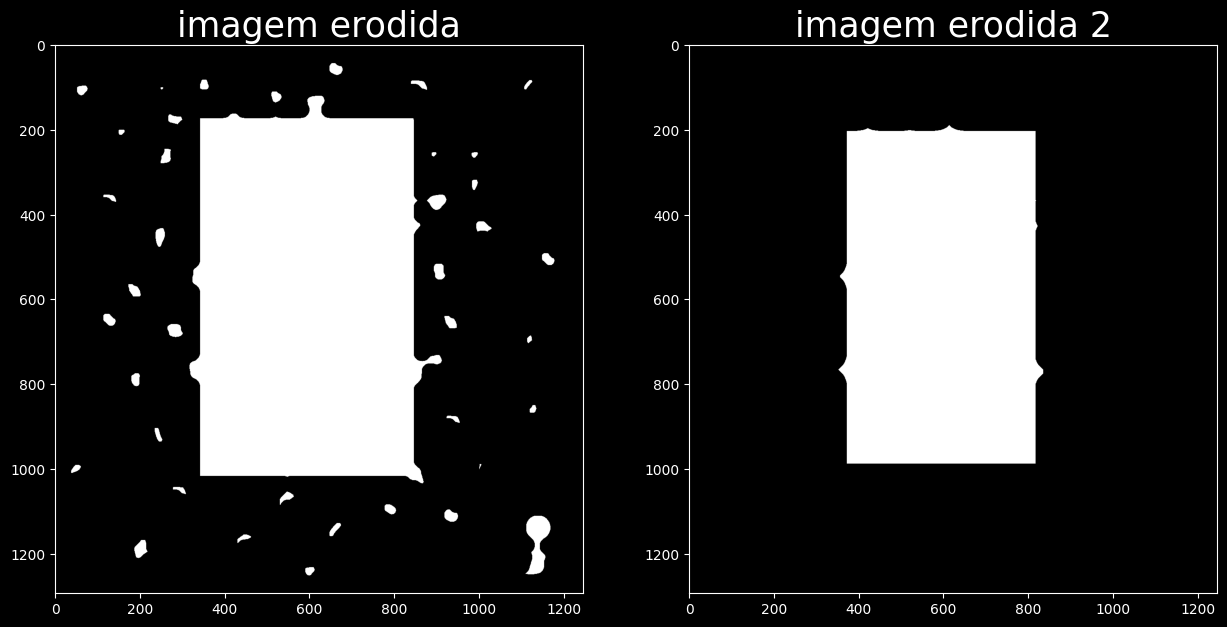

In [ ]:
# EROSÃO DE ABERTURA DEPOIS DO FECHAMENTO

# KERNEL (k)
N = 60
#KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular
KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
#KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KE # escolha da mascara

erode2 = cv2.erode(erode, KQ, iterations=1)

plt.figure(figsize=[15,10]);
plt.subplot(1,2,1);plt.imshow(erode, cmap='gray');plt.title('imagem erodida',size=25)
plt.subplot(1,2,2);plt.imshow(erode2, cmap='gray');plt.title('imagem erodida 2',size=25);

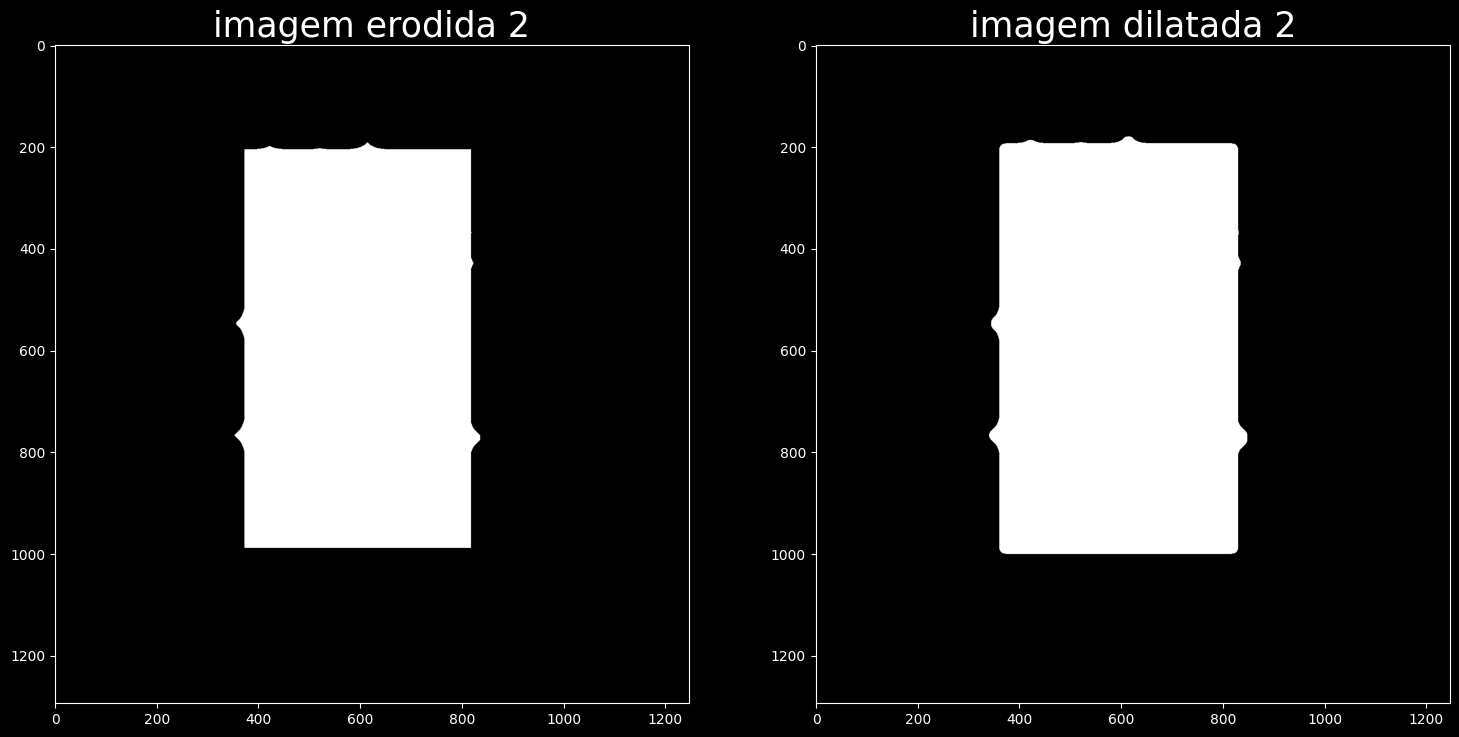

In [ ]:
# DILATAÇÃO DE ABERTURA DEPOIS DO FECHAMENTO

# KERNEL (k)
N = 25 #  tamanho
#KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular
KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
#KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KE # escolha da mascara

dilate2 = cv2.dilate(erode2, KQ, iterations=1)  # processo da lógica hit -> iteractions=1

plt.figure(figsize=(18,10));
plt.subplot(1,2,1);plt.imshow(erode2, cmap ='gray');plt.title('imagem erodida 2',size=25)
plt.subplot(1,2,2);plt.imshow(dilate2, cmap ='gray');plt.title('imagem dilatada 2',size=25);

Na comparação abaixo, é possível notar que houve a eliminação dos elementos que corrompem o fundo preto e o retângulo branco, após a utilização de métodos de morfologia matemática.

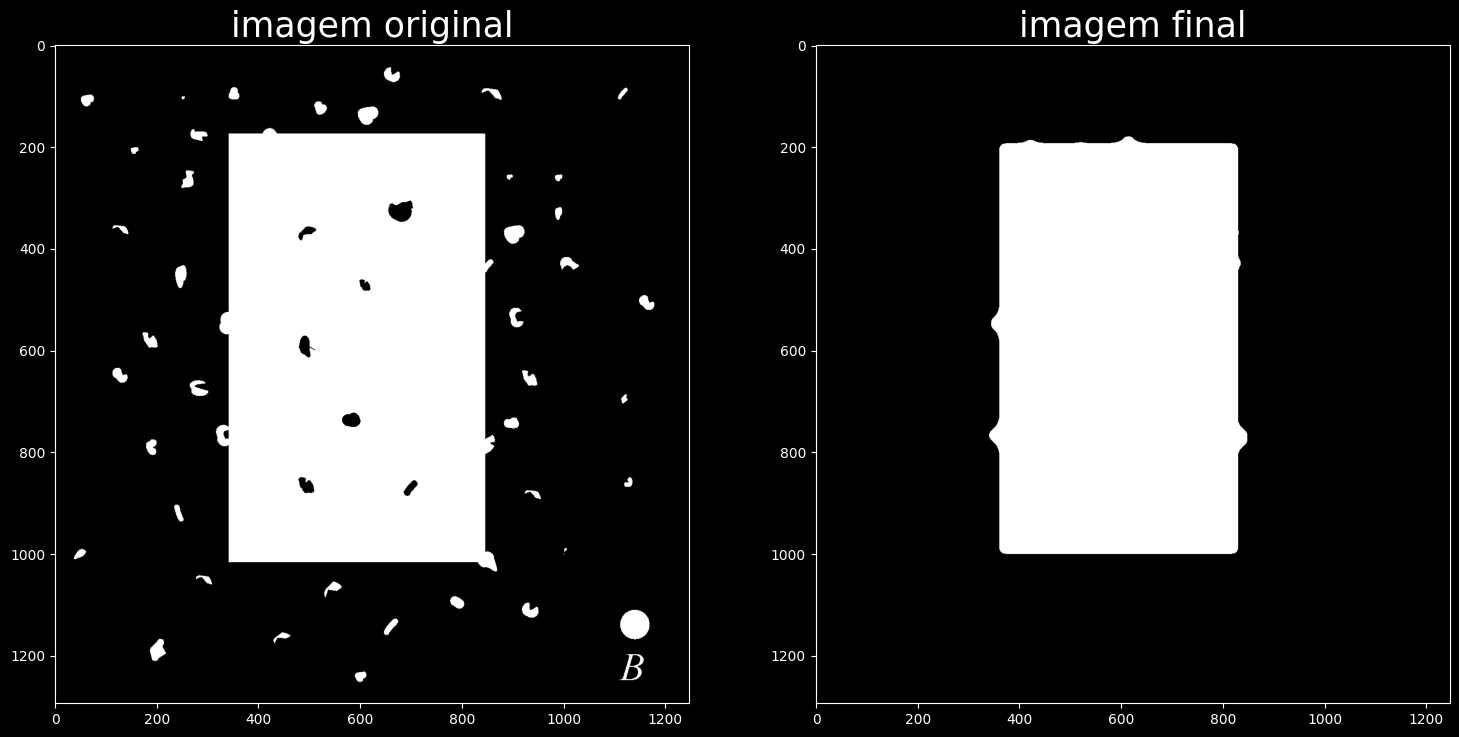

In [ ]:
plt.figure(figsize=(18,10));
plt.subplot(1,2,1);plt.imshow(img, cmap ='gray');plt.title('imagem original',size=25)
plt.subplot(1,2,2);plt.imshow(dilate2, cmap ='gray');plt.title('imagem final',size=25);

# **Questão 3**

a) Aplique a técnica de aguçamento na imagem; Plote a imagem original e a aguçada, uma ao lado da
outra discuta qualitativamente o resultado obtido.

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Text(0.5, 1.0, 'imagem original')

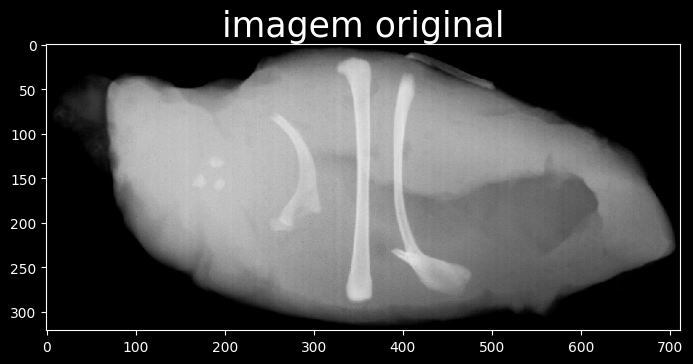

In [ ]:
# Carregamento da imagem
img = cv2.imread('Fig0918(a)(Chickenfilet with bones).tif')

plt.figure(figsize=(18,10));
plt.subplot(1,2,1);plt.imshow(img, cmap ='gray');plt.title('imagem original',size=25)

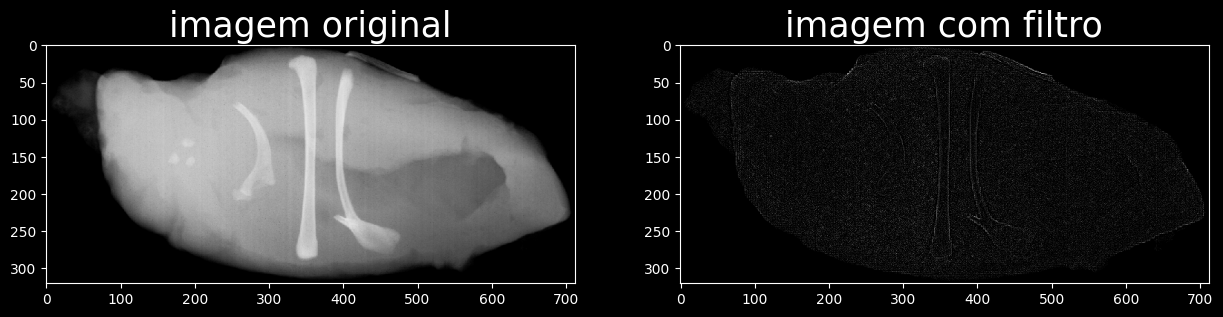

In [ ]:
# Converte a imagem para escala de cinza
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converte P&B

# kernel personalizado -> filtro passa-alta laplaciano: acentua bordas e realça contraste
# O efeito indesejado destes filtros é o de enfatizar o ruído presente na imagem
# Acentua as frequências espaciais elevadas da imagem.
# – Acentua as fronteiras da imagem.
# – Parece tornar a imagem mais “nítida”.
kernel = np.array([[0.0, -1.0, 0.0],
                  [-1.0, 4.0, -1.0],
                 [0.0, -1.0, 0.0]])

# Aplica o filtro personalizado na imagem em escala de cinza
img_f = cv2.filter2D(img_,-1,kernel)

#h_img = cv2.hconcat([img_, img_f])

# Exibe as imagens lado a lado
plt.figure(figsize=[15,10]);
plt.subplot(1,2,1);plt.imshow(img, cmap='gray');plt.title('imagem original',size=25)
plt.subplot(1,2,2);plt.imshow(img_f, cmap='gray');plt.title('imagem com filtro',size=25);

plt.show()

Com a aplicação do filtro Laplaciano (passa-alta) é possível notar que a imagem está com tons mais escuros e está pouco visível em relação a detalhes e a borda. Necessitando da técnica de aguçamento, em seguida.

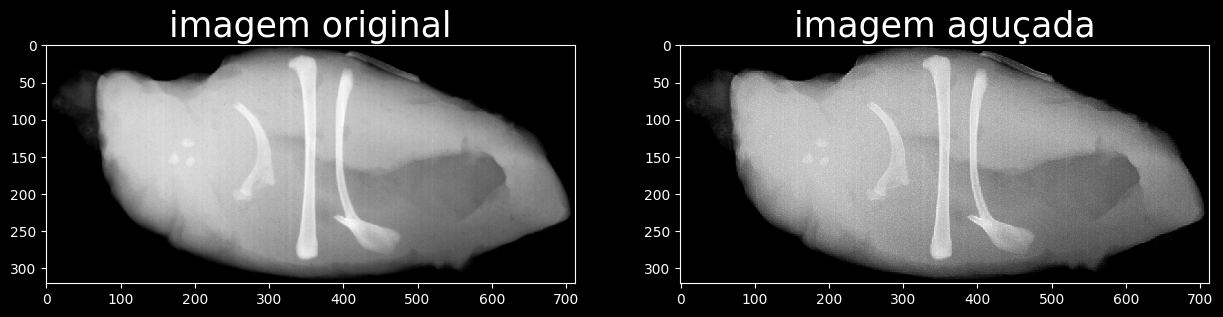

In [ ]:
# AGUÇAMENTO -> mais destaque nas bordas -> mais nítido -> acentua detalhes
# Atenuam ou eliminam as baixas freqüências, realçando as altas freqüências e são normalmente usados para realçar os detalhes na imagem (aguçamento – sharpening)

agucamento=cv2.add(img_, img_f) # soma imagem original com filtro
plt.figure(figsize=[15,10]);
plt.subplot(1,2,1);plt.imshow(img_, cmap='gray');plt.title('imagem original',size=25)
plt.subplot(1,2,2);plt.imshow(agucamento, cmap='gray');plt.title('imagem aguçada',size=25);

plt.show()

Após a aplicação da técnica de aguçamento, é possível notar que, em comparação com a imagem original, a imagem aguçada está mais nítida, visto que o aguçamento realça as bordas e os detalhes da imagem.